In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [5]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [7]:
data = pd.read_csv("Life Expectancy Data.csv")

In [9]:
df = pd.DataFrame(data)

In [11]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [13]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [19]:
print(df.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [21]:
df.columns = df.columns.str.strip()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
df.fillna({'Life expectancy': 69}, inplace=True)

In [25]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [27]:
df.fillna({'Life expectancy': df['Life expectancy'].mean()}, inplace=True)

In [29]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)


In [31]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [37]:
df['Status'].sample(50)

1036    Developing
1563    Developing
1553     Developed
1874    Developing
518     Developing
660     Developing
1682    Developing
2626    Developing
2314     Developed
668     Developing
2622    Developing
1832     Developed
2382    Developing
274     Developing
1866    Developing
2146    Developing
1702    Developing
43      Developing
2830    Developing
1949    Developing
328     Developing
2701    Developing
1485    Developing
1780    Developing
1467    Developing
783     Developing
2572    Developing
2221    Developing
2519     Developed
2281    Developing
2733    Developing
1549     Developed
2564    Developing
612     Developing
1327     Developed
1506    Developing
2126     Developed
268     Developing
1250     Developed
752      Developed
233     Developing
2336     Developed
2712    Developing
1290     Developed
977     Developing
2375    Developing
2369    Developing
41      Developing
2495    Developing
2226    Developing
Name: Status, dtype: object

In [40]:
# One-Hot Encoding 'Genre' column
df = pd.get_dummies(df, columns=['Status'])
print("\nDataset After One-Hot Encoding 'Status':")
df


Dataset After One-Hot Encoding 'Status':


,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,False,True
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,False,True
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,False,True
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,False,True


In [42]:
df['Country'].sample(50)

2467                                                Sudan
2562                                           Tajikistan
2454                                            Sri Lanka
395                                              Bulgaria
2709                                         Turkmenistan
2852                                              Vanuatu
362                                                Brazil
2236                                         Saudi Arabia
2725                                               Uganda
1374                                                Kenya
1752                                              Morocco
91                                              Argentina
2141                                   Russian Federation
54                                                 Angola
2132                                              Romania
1719                                             Mongolia
851                                               Eritrea
1953          

In [160]:
# Label Encoding 'Genre' column
label_encoder = LabelEncoder()
df['Country_LabelEncoded'] = label_encoder.fit_transform(df['Country'])
print("\nDataset After Label Encoding 'Country':")
df[['Country', 'Country_LabelEncoded']]



Dataset After Label Encoding 'Country':


,Country,Country_LabelEncoded
0,Afghanistan,0
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0
...,...,...
2933,Zimbabwe,192
2934,Zimbabwe,192
2935,Zimbabwe,192
2936,Zimbabwe,192


In [46]:
df

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing,Country_LabelEncoded
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True,0
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True,0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True,0
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True,0
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,False,True,192
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,False,True,192
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,False,True,192
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,False,True,192


In [74]:
from sklearn.model_selection import train_test_split

# Split your features (X) and target variable (y) before applying get_dummies
X = df.drop('Life expectancy', axis=1)  # Feature columns
y = df['Life expectancy']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply One-Hot Encoding on X_train and X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure X_train and X_test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [76]:
print(X_train.shape, y_train.shape)


(2056, 210) (2056,)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [80]:
df['Status_Developed'] = df['Status_Developed'].astype(int)
df['Status_Developing'] = df['Status_Developing'].astype(int)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [84]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 3.731331686199422


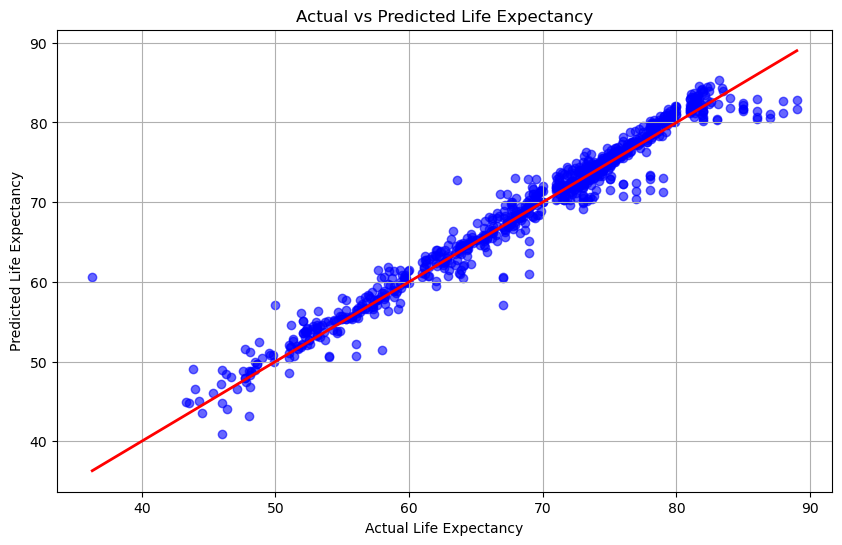

In [89]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # line of perfect prediction
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.grid(True)
plt.show()

In [132]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['Life expectancy'], axis=1)  
y = df['Life expectancy']  
X = pd.get_dummies(X, drop_first=True)  # drop_first=True removes the first category to avoid collinearity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = RandomForestRegressor()

In [134]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')

Mean Squared Error (MSE): 2.492035619047617


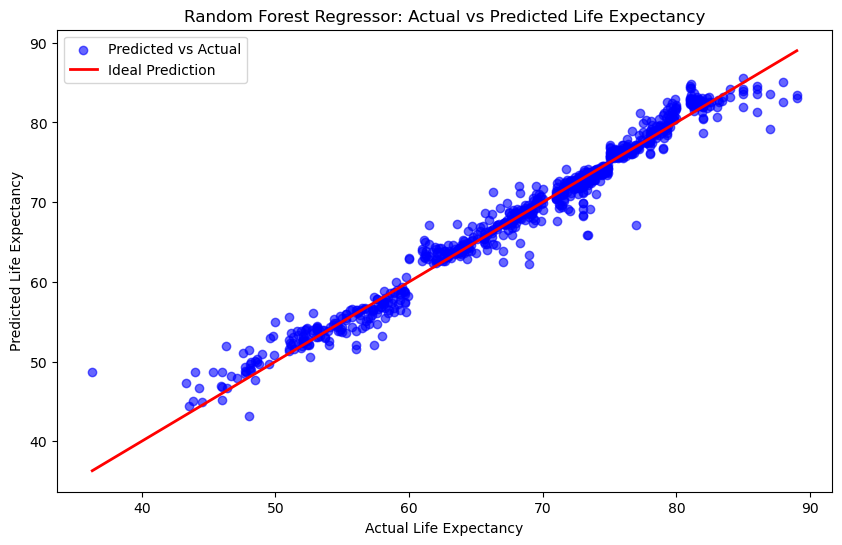

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Random Forest Regressor: Actual vs Predicted Life Expectancy')

plt.legend()

plt.show()



***NOW DOING FEATURE SELECTION***

In [166]:
label_encoder = LabelEncoder()
df['Country_LabelEncoded'] = label_encoder.fit_transform(df['Country'])

print("\nDataset After Label Encoding 'Country':")
print(df[['Country', 'Country_LabelEncoded']].head())

X = df.drop(['Life expectancy', 'Country'], axis=1) 
y = df['Life expectancy']  

#X = pd.get_dummies(X, drop_first=True)







Dataset After Label Encoding 'Country':
       Country  Country_LabelEncoded
0  Afghanistan                     0
1  Afghanistan                     0
2  Afghanistan                     0
3  Afghanistan                     0
4  Afghanistan                     0


In [192]:
df1 = df.drop(['Country', 'Life_expectancy_category'], axis=1)


In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7   Measles                          2938 non-null   int64  
 8   BMI                              2938 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  Diphtheria          

In [198]:
a = df1.corr()
a['Life expectancy']

Year                               0.169527
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196514
Alcohol                            0.391665
percentage expenditure             0.381815
Hepatitis B                        0.203789
Measles                           -0.157557
BMI                                0.559154
under-five deaths                 -0.222482
Polio                              0.461571
Total expenditure                  0.207908
Diphtheria                         0.475415
HIV/AIDS                          -0.556430
GDP                                0.430509
Population                        -0.019634
thinness  1-19 years              -0.472103
thinness 5-9 years                -0.466571
Income composition of resources    0.692468
Schooling                          0.715112
Status_Developed                   0.481999
Status_Developing                 -0.481999
Country_LabelEncoded            

In [202]:
a['Schooling']

Year                               0.203471
Life expectancy                    0.715112
Adult Mortality                   -0.435108
infant deaths                     -0.191757
Alcohol                            0.497546
percentage expenditure             0.388105
Hepatitis B                        0.171755
Measles                           -0.122609
BMI                                0.508105
under-five deaths                 -0.207111
Polio                              0.385832
Total expenditure                  0.218310
Diphtheria                         0.389944
HIV/AIDS                          -0.218620
GDP                                0.429489
Population                        -0.029465
thinness  1-19 years              -0.446140
thinness 5-9 years                -0.435777
Income composition of resources    0.796207
Schooling                          1.000000
Status_Developed                   0.491444
Status_Developing                 -0.491444
Country_LabelEncoded            

In [204]:
a['Income composition of resources']

Year                               0.236333
Life expectancy                    0.692468
Adult Mortality                   -0.440062
infant deaths                     -0.143663
Alcohol                            0.416099
percentage expenditure             0.380374
Hepatitis B                        0.150992
Measles                           -0.115764
BMI                                0.479837
under-five deaths                 -0.161533
Polio                              0.355398
Total expenditure                  0.149095
Diphtheria                         0.371729
HIV/AIDS                          -0.247454
GDP                                0.440317
Population                        -0.007951
thinness  1-19 years              -0.406662
thinness 5-9 years                -0.395779
Income composition of resources    1.000000
Schooling                          0.796207
Status_Developed                   0.457302
Status_Developing                 -0.457302
Country_LabelEncoded            

In [206]:
a['Adult Mortality']

Year                              -0.078861
Life expectancy                   -0.696359
Adult Mortality                    1.000000
infant deaths                      0.078747
Alcohol                           -0.190408
percentage expenditure            -0.242814
Hepatitis B                       -0.138591
Measles                            0.031174
BMI                               -0.381449
under-five deaths                  0.094135
Polio                             -0.272694
Total expenditure                 -0.110875
Diphtheria                        -0.273014
HIV/AIDS                           0.523727
GDP                               -0.277053
Population                        -0.012501
thinness  1-19 years               0.299863
thinness 5-9 years                 0.305366
Income composition of resources   -0.440062
Schooling                         -0.435108
Status_Developed                  -0.315171
Status_Developing                  0.315171
Country_LabelEncoded            

In [267]:
# Create the feature set X with the 3 columns
X = df1[['Adult Mortality', 'Income composition of resources', 'Schooling']]

# Create the target variable y
y = df1['Life expectancy']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# You can check the shapes to confirm everything is correct
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2056, 3)
(882, 3)
(2056,)
(882,)


In [271]:
regressor = RandomForestRegressor()

In [273]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [275]:
y_pred = regressor.predict(X_test)

print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')

Mean Squared Error (MSE): 4.456931280664788
